In [64]:
#Ավելացնում ենք գրադարանները և կարդում dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('chip_dataset.csv')
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [28]:
#Գտնում ենք Missing values ունեցող սյուները և ընդհանուր քսնակը տպում

In [29]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64


In [30]:
#Քանի որ Դատասեթում փոփոխություն ենք անելու, տվյալները րկորցնելու համար կրկնօրինակում ենք 

In [31]:
df_mean_filled = df.copy()
df_median_filled = df.copy()
df_mode_filled = df.copy()

In [32]:
#Վերցրել եմ Ջերմային առավելագույն հզորության չափը և լրացրել mode , miedian, min արժեքներով

In [33]:
mean_value = df['TDP (W)'].mean()
df_mean_filled['TDP (W)'] = df['TDP (W)'].fillna(df['TDP (W)'].mean())

In [34]:
median_value = df['TDP (W)'].median()
df_median_filled['TDP (W)'] = df['TDP (W)'].fillna(df['TDP (W)'].median())

In [35]:
mode_value = df['TDP (W)'].mode()[0]  # mode can return multiple values, so take the first
df_mode_filled['TDP (W)'] = df['TDP (W)'].fillna(df['TDP (W)'].mode())

In [36]:
mean_value

81.35998107852413

In [37]:
median_value

65.0

In [38]:
mode_value

65.0

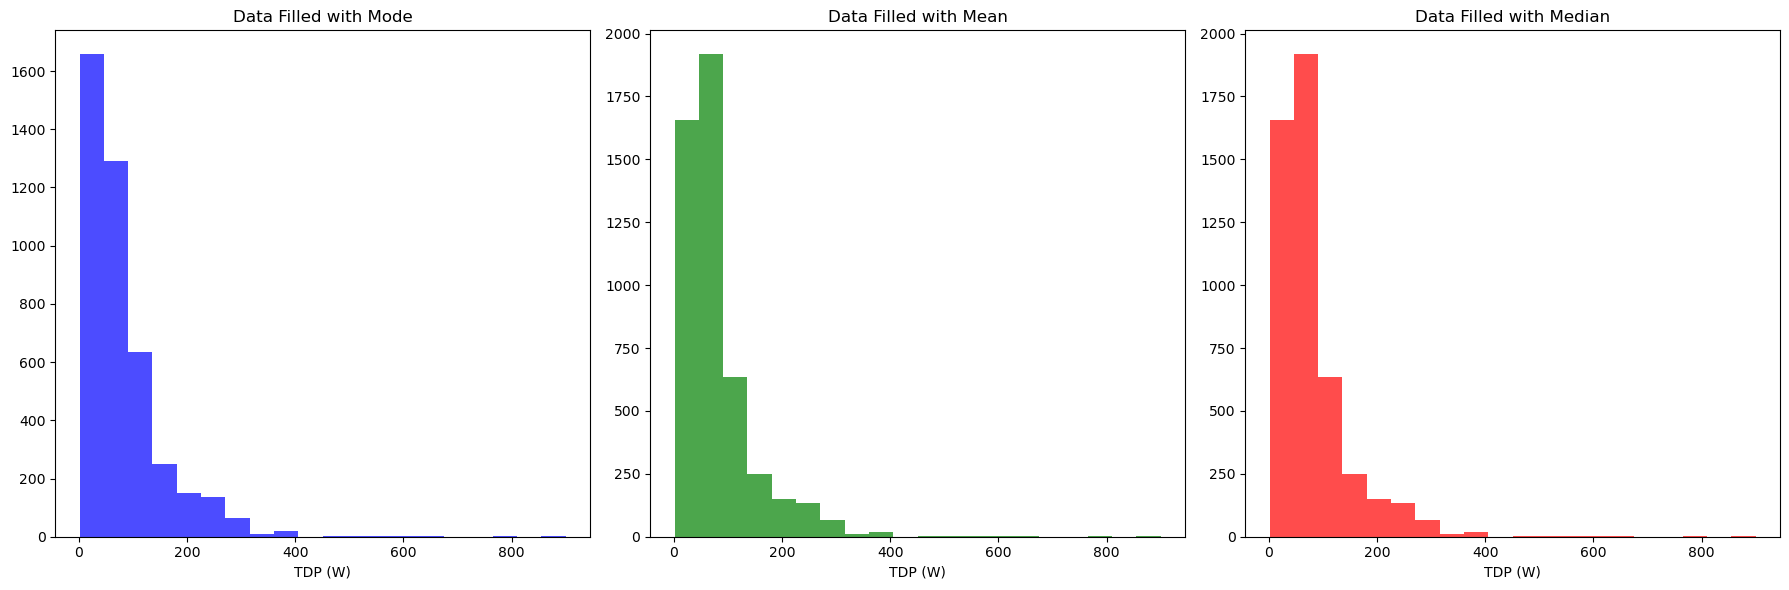

In [39]:
plt.figure(figsize=(18, 6))

#  Data filled with mode
plt.subplot(1, 3, 1)
plt.hist(df_mode_filled['TDP (W)'], bins=20, color='blue', alpha=0.7)
plt.title('Data Filled with Mode')
plt.xlabel('TDP (W)')

# Data filled with mean
plt.subplot(1, 3, 2)
plt.hist(df_mean_filled['TDP (W)'], bins=20, color='green', alpha=0.7)
plt.title('Data Filled with Mean')
plt.xlabel('TDP (W)')

# Data filled with median
plt.subplot(1, 3, 3)
plt.hist(df_median_filled['TDP (W)'], bins=20, color='red', alpha=0.7)
plt.title('Data Filled with Median')
plt.xlabel('TDP (W)')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
mean_value = df['Die Size (mm^2)'].mean()
df_mean_filled['Die Size (mm^2)'] = df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].mean())

In [41]:
median_value = df['Die Size (mm^2)'].median()
df_median_filled['Die Size (mm^2)'] = df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].median())

In [42]:
mode_value = df['Die Size (mm^2)'].mode()[0]  # mode can return multiple values, so take the first
df_mode_filled['Die Size (mm^2)'] = df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].mode())

In [43]:
mean_value

188.4404445518241

In [44]:
median_value

148.0

In [45]:
mode_value

118.0

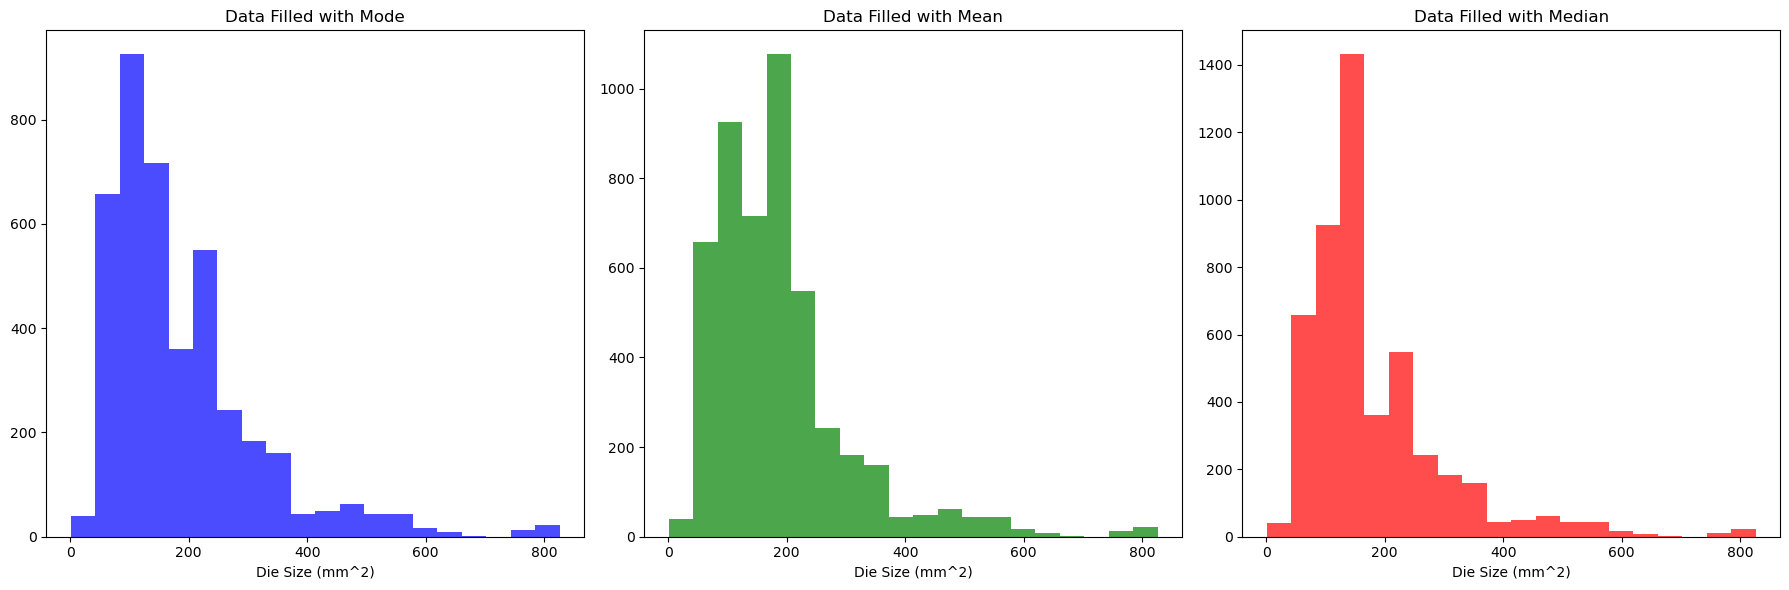

In [46]:
plt.figure(figsize=(18, 6))

#  Data filled with mode
plt.subplot(1, 3, 1)
plt.hist(df_mode_filled['Die Size (mm^2)'], bins=20, color='blue', alpha=0.7)
plt.title('Data Filled with Mode')
plt.xlabel('Die Size (mm^2)')

# Data filled with min
plt.subplot(1, 3, 2)
plt.hist(df_mean_filled['Die Size (mm^2)'], bins=20, color='green', alpha=0.7)
plt.title('Data Filled with Mean')
plt.xlabel('Die Size (mm^2)')

# Data filled with median
plt.subplot(1, 3, 3)
plt.hist(df_median_filled['Die Size (mm^2)'], bins=20, color='red', alpha=0.7)
plt.title('Data Filled with Median')
plt.xlabel('Die Size (mm^2)')

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')  # Coerce errors to handle invalid dates
df['Year'] = df['Release Date'].dt.year

In [48]:
transistor_by_year_mean = df.groupby('Year')['Transistors (million)'].mean().reset_index()
transistor_by_year_median = df.groupby('Year')['Transistors (million)'].median().reset_index()
transistor_by_year_mode = df.groupby('Year')['Transistors (million)'].agg(lambda x: x.mode()[0]).reset_index()

transistor_by_year_mean = transistor_by_year_mean[['Transistors (million)', 'Year']]
transistor_by_year_median = transistor_by_year_median[['Transistors (million)', 'Year']]
transistor_by_year_mode = transistor_by_year_mode[['Transistors (million)', 'Year']]


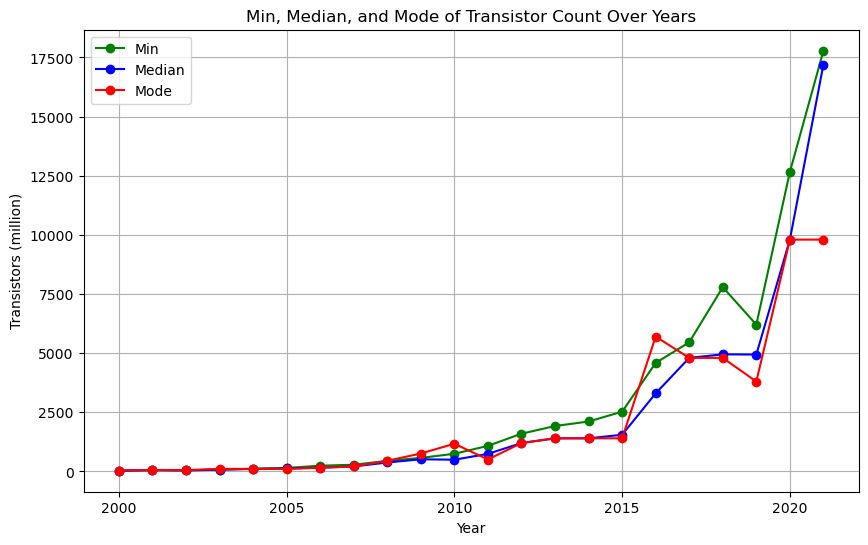

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(transistor_by_year_mean['Year'], transistor_by_year_mean['Transistors (million)'], marker='o', linestyle='-', color='green', label='Min')

plt.plot(transistor_by_year_median['Year'], transistor_by_year_median['Transistors (million)'], marker='o', linestyle='-', color='blue', label='Median')

plt.plot(transistor_by_year_mode['Year'], transistor_by_year_mode['Transistors (million)'], marker='o', linestyle='-', color='red', label='Mode')

plt.title('Min, Median, and Mode of Transistor Count Over Years')
plt.xlabel('Year')
plt.ylabel('Transistors (million)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()